# Airlines Customer Satisfaction 


## 1. Problem Statement


Customer satisfaction with airline services is a crucial aspect of the aviation industry. It encompasses various factors such as:

1- Flight Experience: This includes aspects like comfort, cleanliness, and amenities onboard the aircraft. Passengers expect a comfortable and pleasant flight experience, which can significantly impact their satisfaction.

2- Service Quality: The quality of service provided by airline staff, including flight attendants and ground crew, plays a vital role in customer satisfaction. Prompt and courteous service can enhance the overall experience.

3- Punctuality and Reliability: Timeliness is crucial for passengers, and delays or cancellations can lead to frustration and dissatisfaction. Airlines that consistently adhere to their schedules and provide reliable service are more likely to satisfy their customers.

4- Booking Process: The ease of booking flights, managing reservations, and accessing relevant information through airline websites or mobile apps can influence customer satisfaction. A user-friendly booking process is essential for a positive experience.

5- Baggage Handling: Efficient handling of baggage, including timely delivery and minimizing mishandling incidents, is critical for passenger satisfaction. Lost or damaged luggage can significantly impact the travel experience negatively.

6- In-Flight Entertainment and Amenities: Modern passengers expect entertainment options and amenities to enhance their journey, such as Wi-Fi access, in-flight entertainment systems, and comfortable seating arrangements.

7- Safety and Security: Passengers prioritize safety and security when choosing an airline. Airlines that prioritize safety measures and maintain high-security standards contribute to passenger confidence and satisfaction.

8- Analyzing and addressing these factors can help airlines improve their services and enhance customer satisfaction levels, ultimately leading to increased loyalty and positive word-of-mouth recommendations.

In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_10308\2076694308.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Load the Date
df=  pd.read_csv('Customer_Satisfaction.csv')
df.head(5)

,ID,Gender,Customer-Type,Age,Type-Travel,Class,Flight Distance,wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,M,Loyal,13,Personal,Eco Plus,450,4,3,4,...,5,3,4,3,3,5,5,15,28.0,neutral or dissatisfied
1,5047,M,disloyal,25,Business,Business,235,4,1,4,...,2,2,5,4,2,3,2,2,3.0,neutral or dissatisfied
2,110028,F,Loyal,26,Business,Business,1142,1,1,1,...,5,3,4,3,3,3,5,0,0.0,satisfied
3,24026,F,Loyal,25,Business,Business,552,1,5,5,...,1,1,5,4,2,3,1,22,9.0,neutral or dissatisfied
4,119299,M,Loyal,61,Business,Business,214,4,4,4,...,4,4,3,3,4,4,4,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer-Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type-Travel                        103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7    wifi service                      103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### 4. Exploratory Data Analysis (EDA)

### 4.1 Observation:

1- The dataset does not contain any duplicate records.

2- Ratings typically range from 1 to 5. However, there are instances where the rating is recorded as zero. To address this inconsistency, all zero ratings will be replaced with the mode value of the ratings or deleted.

3- There is a strong positive correlation between Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes.
Similarly, Arrival_Delay_in_Minutes is highly correlated with Departure_Delay_in_Minutes.
Feature Selection:

4- Certain columns do not contribute significantly to customer satisfaction rating and can be dropped. 

These actions aim to enhance the quality of the dataset and improve the reliability of the subsequent analysis.

### 4.2 Cleaning data and Handling missing data

In [4]:
Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_values = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)

                                   Total   Percent
Arrival Delay in Minutes             310  0.298352
ID                                     0  0.000000
Gender                                 0  0.000000
Departure Delay in Minutes             0  0.000000
Cleanliness                            0  0.000000
Inflight service                       0  0.000000
Checkin service                        0  0.000000
Baggage handling                       0  0.000000
Leg room service                       0  0.000000
On-board service                       0  0.000000
Inflight entertainment                 0  0.000000
Seat comfort                           0  0.000000
Online boarding                        0  0.000000
Food and drink                         0  0.000000
Gate location                          0  0.000000
Ease of Online booking                 0  0.000000
Departure/Arrival time convenient      0  0.000000
 wifi service                          0  0.000000
Flight Distance                

#### 
1- Arrival Delay in Minutes has a small number of missing values, specifically 310 entries representing 0.298352% of the total dataset. These missing values can be effectively replaced by the mode value.

2- Replacing all the zero ratings with their respective mode values, as ratings cannot be zero. Note that we are not considering Departure Delay and Arrival Delay in Minutes, as the value '0' can be expected in case of no delay.

In [5]:
df['Arrival Delay in Minutes'].mode()

0    0.0
Name: Arrival Delay in Minutes, dtype: float64

In [6]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [7]:
df['Arrival Delay in Minutes'].count() # filled all the missing values

103904

In [8]:
df[df['Arrival Delay in Minutes'].isnull()]

,ID,Gender,Customer-Type,Age,Type-Travel,Class,Flight Distance,wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [9]:
mode_zero = df[['Checkin service', 'Cleanliness', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                'Food and drink', 'Inflight entertainment', 'Inflight service', 'Online boarding', 'Seat comfort', 
                'Baggage handling']]




In [10]:
mode_zero.min()  # removed all the zero ratings.

Checkin service                      0
Cleanliness                          0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Inflight entertainment               0
Inflight service                     0
Online boarding                      0
Seat comfort                         0
Baggage handling                     1
dtype: int64

#### Calculating Total and Average Rating per customer

In [11]:
df['Rating_score']= mode_zero.sum(axis=1)
df['Ave_Rating']= df['Rating_score']/13
df['Ave_Rating']= df['Ave_Rating'].round(2)

### To remove columns that do not contribute to customer satisfaction rating from the DataFrame, we identify the columns that do not add value and then drop them. Here are the columns we have identified :
1- Type_of_Travel

2- id

3- Gate_location

4- Flight_Distance

5- Customer_Type

6- Class

These columns will be dropped as they are not considered relevant to customer satisfaction rating.






In [12]:
df.head(3)

,ID,Gender,Customer-Type,Age,Type-Travel,Class,Flight Distance,wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating
0,70172,M,Loyal,13,Personal,Eco Plus,450,4,3,4,...,4,3,3,5,5,15,28.0,neutral or dissatisfied,42,3.23
1,5047,M,disloyal,25,Business,Business,235,4,1,4,...,5,4,2,3,2,2,3.0,neutral or dissatisfied,26,2.00
2,110028,F,Loyal,26,Business,Business,1142,1,1,1,...,4,3,3,3,5,0,0.0,satisfied,36,2.77


In [13]:
df.drop(['ID', 'Type-Travel', 'Flight Distance', 
         'Departure/Arrival time convenient', 'Ease of Online booking',
         'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
         'Inflight entertainment', 'On-board service', 'Leg room service',
         'Baggage handling', 'Checkin service', 'Inflight service',
         'Cleanliness'], axis=1, inplace=True)

In [104]:
df

,Gender,Customer-Type,Age,Class,wifi service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating
0,M,Loyal,13,Eco Plus,4,15,28.0,neutral or dissatisfied,42,3.23
1,M,disloyal,25,Business,4,2,3.0,neutral or dissatisfied,26,2.00
2,F,Loyal,26,Business,1,0,0.0,satisfied,36,2.77
3,F,Loyal,25,Business,1,22,9.0,neutral or dissatisfied,24,1.85
4,M,Loyal,61,Business,4,0,0.0,satisfied,40,3.08
...,...,...,...,...,...,...,...,...,...,...
103899,F,disloyal,23,Eco,1,4,0.0,neutral or dissatisfied,16,1.23
103900,M,Loyal,49,Business,3,0,0.0,satisfied,38,2.92
103901,M,disloyal,30,Business,2,7,23.0,neutral or dissatisfied,33,2.54
103902,F,disloyal,22,Eco,2,0,0.0,neutral or dissatisfied,24,1.85


In [14]:
df['age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,20,40,60,86],
                         labels=['0-20','21-40','41-60','61+'], include_lowest=True)              
df.drop('Age',axis=1, inplace=True)

In [15]:
df.head()

,Gender,Customer-Type,Class,wifi service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating,age_Group
0,M,Loyal,Eco Plus,4,15,28.0,neutral or dissatisfied,42,3.23,0-20
1,M,disloyal,Business,4,2,3.0,neutral or dissatisfied,26,2.00,21-40
2,F,Loyal,Business,1,0,0.0,satisfied,36,2.77,21-40
3,F,Loyal,Business,1,22,9.0,neutral or dissatisfied,24,1.85,21-40
4,M,Loyal,Business,4,0,0.0,satisfied,40,3.08,61+


In [16]:
df.head(2)

,Gender,Customer-Type,Class,wifi service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating,age_Group
0,M,Loyal,Eco Plus,4,15,28.0,neutral or dissatisfied,42,3.23,0-20
1,M,disloyal,Business,4,2,3.0,neutral or dissatisfied,26,2.00,21-40


###  Data Visualization
Let's visualize the data to gain a better understanding and draw conclusions.
First, we'll examine the overall satisfaction levels.
Then, we'll explore the satisfaction percentages for male and female customers of different types and classes.

In [17]:
df.head(5)

,Gender,Customer-Type,Class,wifi service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating,age_Group
0,M,Loyal,Eco Plus,4,15,28.0,neutral or dissatisfied,42,3.23,0-20
1,M,disloyal,Business,4,2,3.0,neutral or dissatisfied,26,2.00,21-40
2,F,Loyal,Business,1,0,0.0,satisfied,36,2.77,21-40
3,F,Loyal,Business,1,22,9.0,neutral or dissatisfied,24,1.85,21-40
4,M,Loyal,Business,4,0,0.0,satisfied,40,3.08,61+


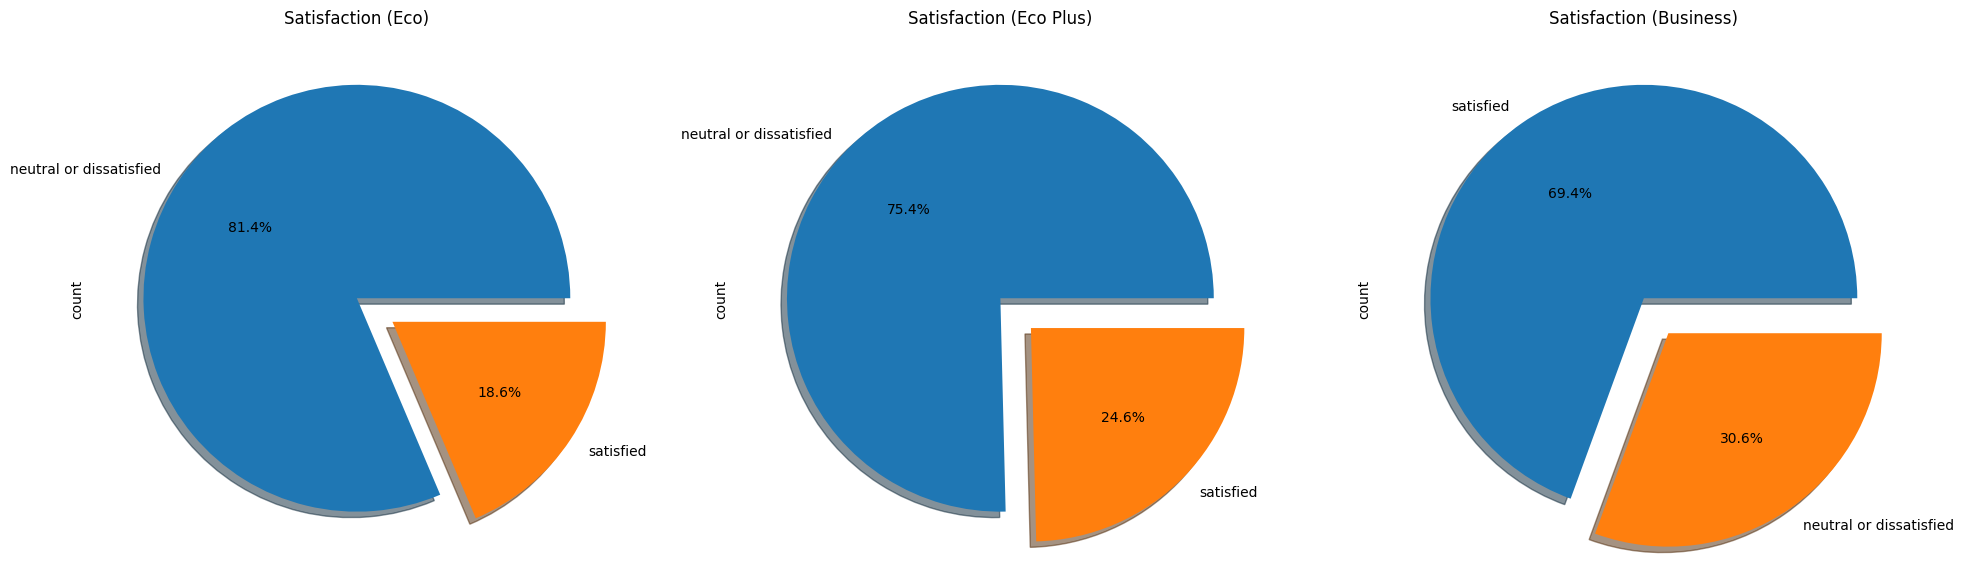

In [20]:
f, ax = plt.subplots(1, 3, figsize=(20, 20))

# Define explode parameters
explode_eco = [0, 0.2] if 'Eco' in df['Class'].unique() else None
explode_ecoplus = [0, 0.2] if 'Eco Plus' in df['Class'].unique() else None
explode_business = [0, 0.2] if 'Business' in df['Class'].unique() else None

# Plot pie charts with explode parameter adjusted
df['satisfaction'][df['Class'] == 'Eco'].value_counts().plot.pie(explode=explode_eco, autopct='%1.1f%%', ax=ax[0], shadow=True)
df['satisfaction'][df['Class'] == 'Eco Plus'].value_counts().plot.pie(explode=explode_ecoplus, autopct='%1.1f%%', ax=ax[1], shadow=True)
df['satisfaction'][df['Class'] == 'Business'].value_counts().plot.pie(explode=explode_business, autopct='%1.1f%%', ax=ax[2], shadow=True)

# Set titles
ax[0].set_title('Satisfaction (Eco)')
ax[1].set_title('Satisfaction (Eco Plus)')
ax[2].set_title('Satisfaction (Business)')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

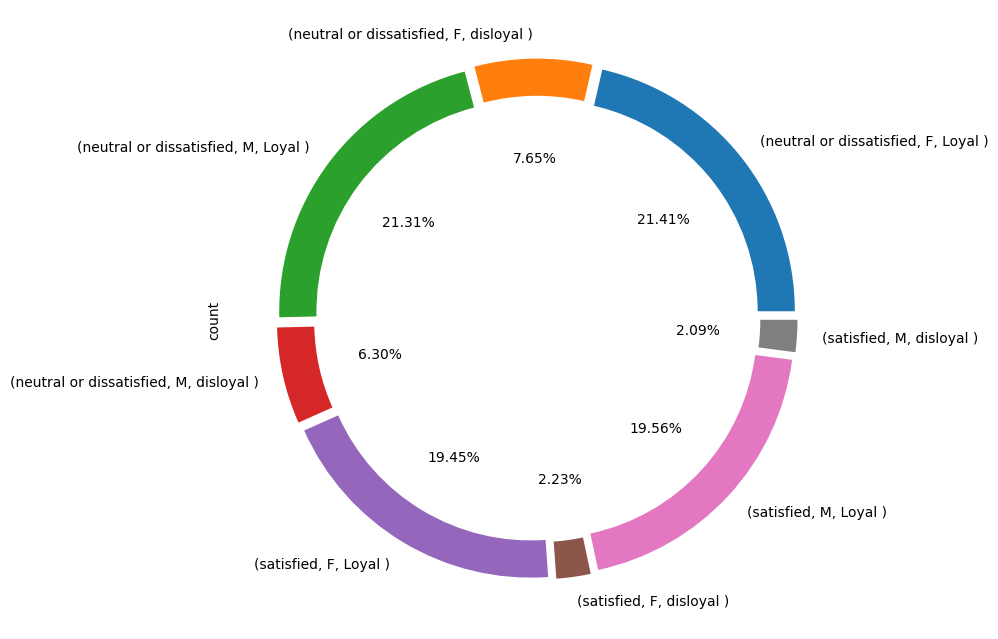

In [21]:


df.groupby(['satisfaction','Gender'])['Customer-Type'].value_counts().plot(kind='pie', autopct='%.2f%%',explode= np.ones(8)/20,wedgeprops=dict(width=0.15),figsize=(8,10))

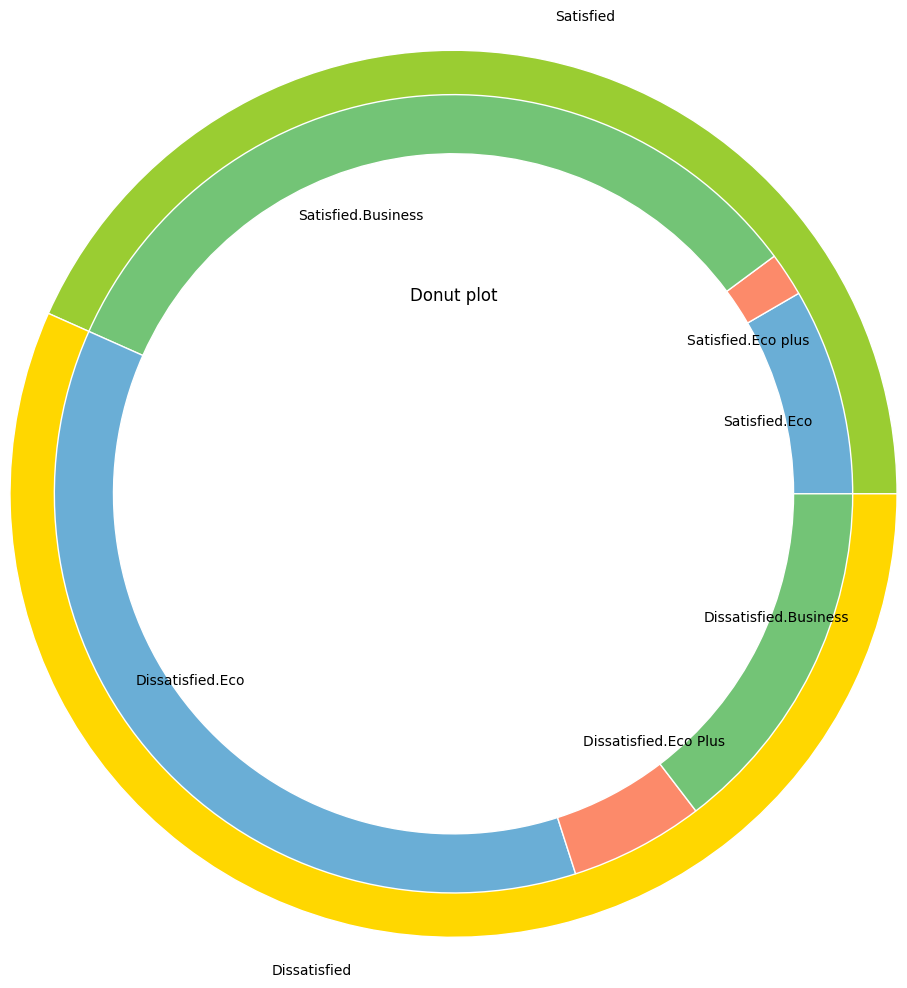

In [22]:
group_names=['Satisfied', 'Dissatisfied']
group_size=[45025,58879]
subgroup_names=['Satisfied.Eco','Satisfied.Eco plus','Satisfied.Business','Dissatisfied.Eco','Dissatisfied.Eco Plus','Dissatisfied.Business']
subgroup_size=[8701,1844,34480,38044,5650,15185]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.7, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), c(0.5), a(0.5), b(0.4), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')

plt.margins(0,0)
plt.title('Donut plot')
plt.show()

In [23]:
df.groupby(['satisfaction'])['satisfaction'].count().to_frame()

,satisfaction
satisfaction,
neutral or dissatisfied,58879
satisfied,45025


In [24]:
df.groupby(['satisfaction','Ave_Rating'])['satisfaction'].count().to_frame()

satisfaction
satisfaction            Ave_Rating              
neutral or dissatisfied 0.62                   1
                        0.69                   1
                        0.77                  16
                        0.85                  35
                        0.92                  52
...                                          ...
satisfied               3.54                 618
                        3.62                 314
                        3.69                 239
                        3.77                  68
                        3.85                  42

[86 rows x 1 columns]

### Calculating Total Delay.

In [25]:
df['Total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

c:\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


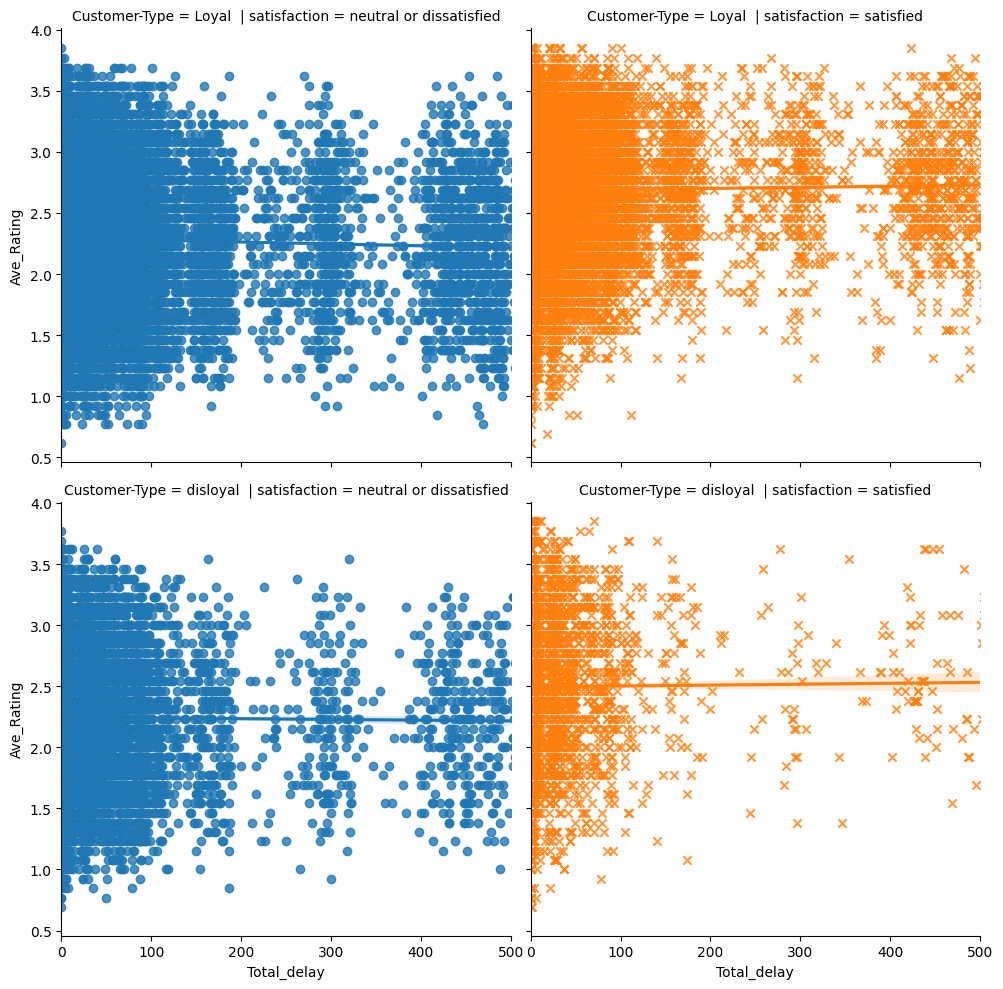

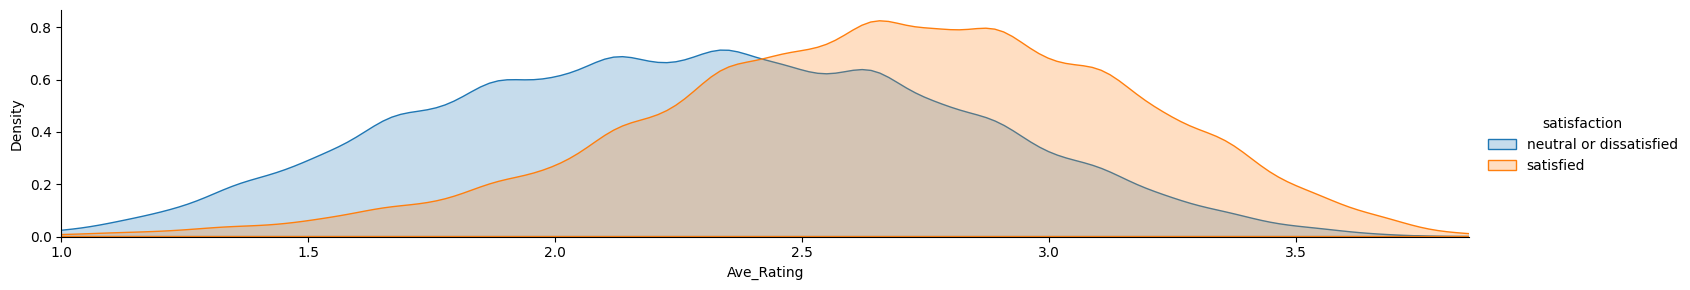

In [26]:
lm = sns.lmplot(x='Total_delay' , y='Ave_Rating' , data=df, col= 'satisfaction',row ='Customer-Type', hue='satisfaction', markers=['o','x'],sharex=True,sharey=True)
lm.set(xlim=(0,500), xticks=[0,100,200,300,400,500])
fig = sns.FacetGrid(df,hue='satisfaction',aspect=5)
fig.map(sns.kdeplot,'Ave_Rating',shade=True)
fg= df['Ave_Rating'].max()
fig.set(xlim=(1,fg))
fig.add_legend()

The FacetGrid analysis delineates the correlation between Total Delay and Average Rating. Notably, within the neutral or dissatisfied spectrum, there's an absence of customers receiving a perfect 5/5 rating. The distribution appears slightly left-skewed, indicating that even customers without delays remain unsatisfied. This dissatisfaction likely stems from various rating factors contributing to their experience.
Conversely, among satisfied customers, the graph exhibits a right-skewed distribution. This suggests that higher ratings correspond to increased customer satisfaction. Remarkably, instances of no delay or delays of around 3 hours, coupled with favorable ratings, significantly contribute to customer contentment within the majority of the demographic.






In the analysis, it appears that lower ratings predominantly come from customers in the Eco and Eco Plus classes. Conversely, higher ratings, averaging around 3.8, are more common among Business Class customers.

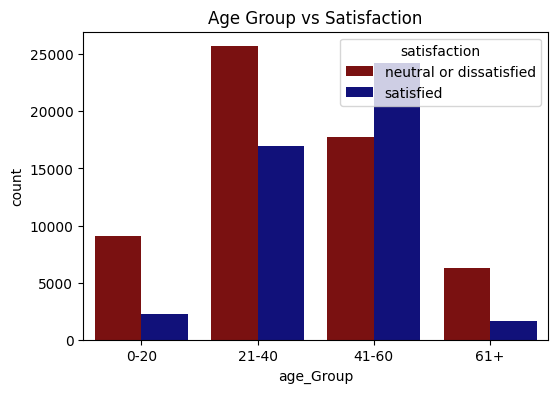

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x='age_Group', hue='satisfaction', palette={'satisfied': 'darkblue', 'neutral or dissatisfied': 'darkred'})
plt.title('Age Group vs Satisfaction')
plt.show()

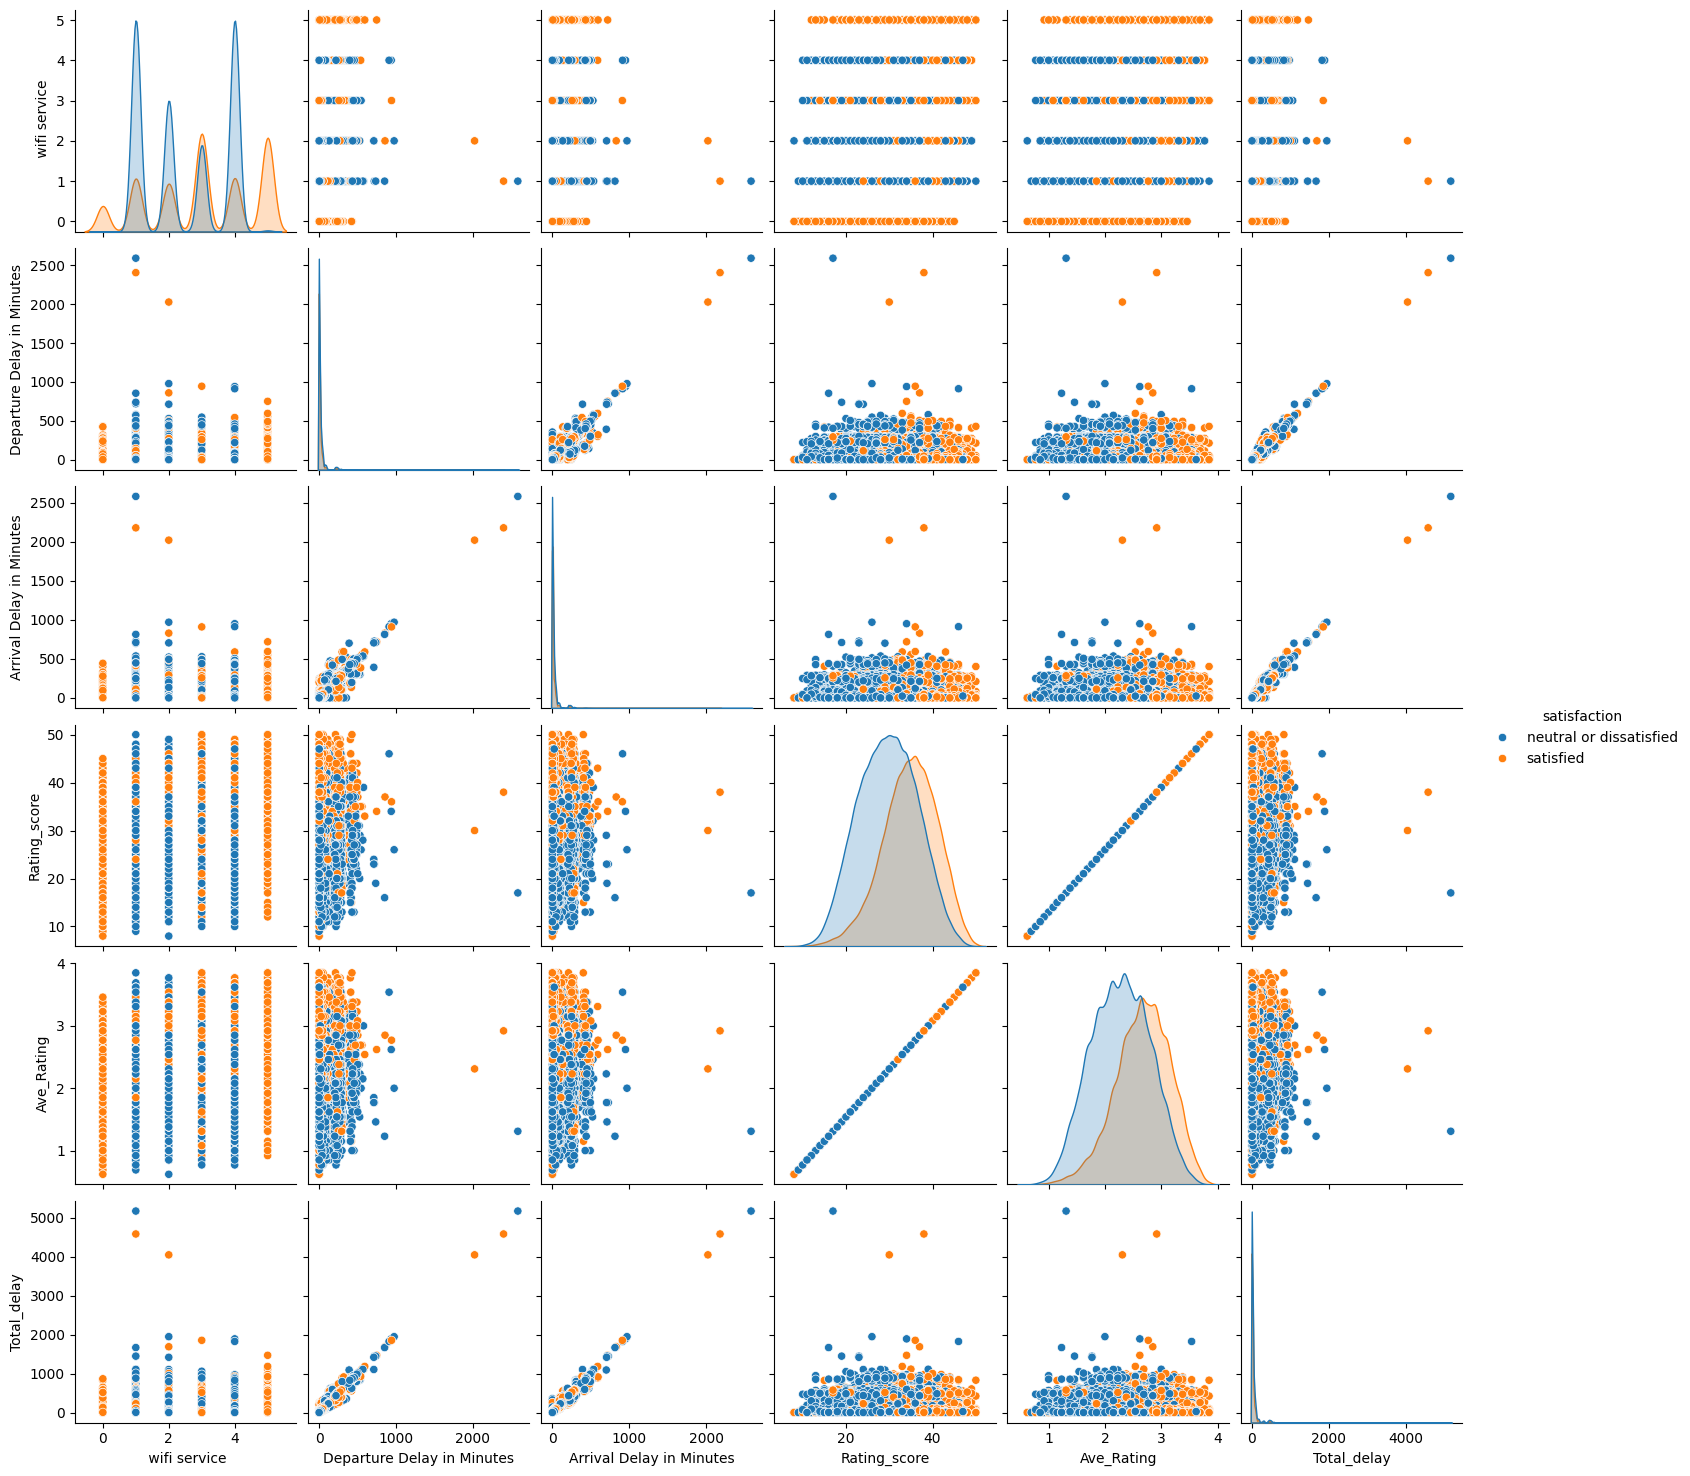

In [28]:
sns.pairplot(df, hue='satisfaction')

### NOTE:
Pair Plot Analysis:

Upon examining the pair plot visuals, we observe significant collinearity among several variables, notably between Ave_Rating, Rating_score, and the Departure/Arrival Delay in Minutes.

Given the presence of the Total_Delay variable, which inherently encapsulates the departure and arrival delays, we can logically conclude that retaining both individual delay metrics, i.e., Departure Delay in Minutes and Arrival Delay in Minutes, may introduce redundancy. Therefore, it is advisable to drop these individual delay metrics to streamline the dataset and avoid potential multicollinearity issues.

Furthermore, considering the high correlation between Ave_Rating and Rating_score, it becomes imperative to optimize the feature set by eliminating redundant variables. Consequently, the logical course of action entails retaining the more comprehensive metric, Average Rating, and discarding Rating_score to maintain model efficiency and interpretability.

In [208]:
df.head(5)

,Gender,Customer-Type,Class,wifi service,satisfaction,Ave_Rating,age_Group,Total_delay
0,M,Loyal,Eco Plus,4,neutral or dissatisfied,3.23,0-20,43.0
1,M,disloyal,Business,4,neutral or dissatisfied,2.00,21-40,5.0
2,F,Loyal,Business,1,satisfied,2.77,21-40,0.0
3,F,Loyal,Business,1,neutral or dissatisfied,1.85,21-40,31.0
4,M,Loyal,Business,4,satisfied,3.08,61+,0.0


<Axes: xlabel='Class', ylabel='Ave_Rating'>

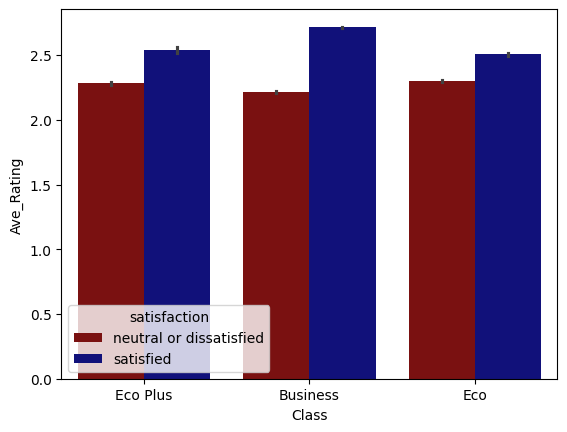

In [30]:
custom_colors = {'neutral or dissatisfied': 'darkred', 'satisfied': 'darkblue'}
sns.barplot(data=df, x='Class', y='Ave_Rating', hue='satisfaction', palette=custom_colors)


<Axes: xlabel='Class', ylabel='Total_delay'>

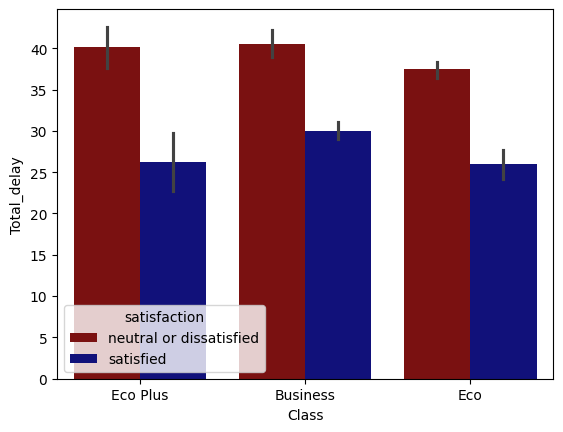

In [31]:
custom_colors = {'neutral or dissatisfied': 'darkred', 'satisfied': 'darkblue'}
sns.barplot(data=df, x='Class', y='Total_delay', hue='satisfaction', palette=custom_colors)

<Axes: xlabel='Ave_Rating', ylabel='Total_delay'>

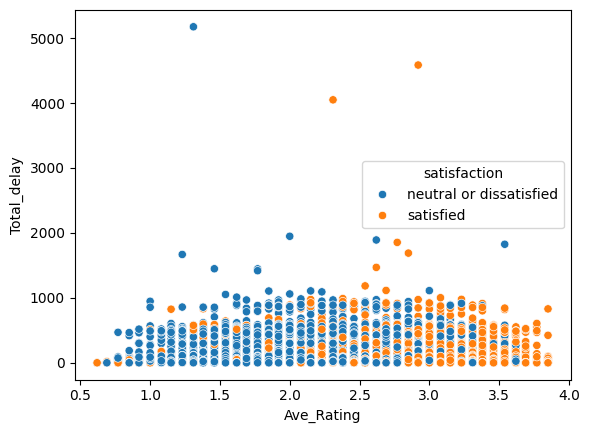

In [29]:
sns.scatterplot(data=df, x='Ave_Rating', y='Total_delay', hue='satisfaction')

# Conclusion:
We can establish that both Departure Delay in Minutes and Arrival Delay in Minutes exert a substantial influence on customer satisfaction, surpassing the overall rating's impact. This conclusion is drawn from the observation that delays in departure and arrival directly affect passengers' experiences, leading to heightened dissatisfaction when flights deviate from scheduled times. In contrast, while the overall rating provides a general assessment of the flight experience, it may not capture the immediacy and intensity of negative sentiments induced by delays. Therefore, addressing and minimizing delays can be pivotal in enhancing customer satisfaction levels and fostering positive perceptions of airline services